In [76]:
import pandas as pd
import pygmt
import os

In [77]:
import warnings
warnings.filterwarnings('ignore')

## Cargar los datos

In [78]:
data= pd.read_csv('events.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24159 entries, 0 to 24158
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ev_id         24159 non-null  object 
 1   otime         24159 non-null  object 
 2   loc           24121 non-null  object 
 3   lat           24159 non-null  float64
 4   lon           24159 non-null  float64
 5   dep           24159 non-null  float64
 6   mag           24159 non-null  float64
 7   alert         11 non-null     object 
 8   url           24159 non-null  object 
 9   ev_type       24159 non-null  object 
 10  significance  24159 non-null  int64  
 11  year          24159 non-null  int64  
 12  date_str      24159 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 2.4+ MB


In [79]:
data.head()

,ev_id,otime,loc,lat,lon,dep,mag,alert,url,ev_type,significance,year,date_str
0,uu60061837,2014-03-30 12:34:39.160,"22 km S of Mammoth, Wyoming",44.772167,-110.684667,5.62,4.83,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,700,2014,2014-03-30T12:34:39.160000Z
1,us20006umx,2016-08-27 20:47:47.240,"4 km ENE of Bondurant, Wyoming",43.222600,-110.359300,12.30,4.80,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,580,2016,2016-08-27T20:47:47.240000Z
2,uu60203137,2017-06-16 00:48:46.940,"12 km E of Hebgen Lake Estates, Montana",44.781333,-111.033167,9.30,4.36,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,346,2017,2017-06-16T00:48:46.940000Z
3,mb80153724,2016-06-13 12:14:39.050,"45 km W of Hebgen Lake Estates, Montana",44.730167,-111.763667,9.95,4.34,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,291,2016,2016-06-13T12:14:39.050000Z
4,uu60497322,2022-05-11 13:32:02.230,"36 km S of Silver Gate, Montana",44.681000,-109.996333,13.95,4.22,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,300,2022,2022-05-11T13:32:02.230000Z


### Poner los datos en otime

In [80]:
data['otime'] = pd.to_datetime(data['otime'])

print (data['otime'].min())
print (data['otime'].max())


2012-01-03 10:56:11.780000
2022-09-29 23:59:13.570000


**Sismos en el 2020**

In [81]:
t_0 = pd.to_datetime(f"{'2020-01-01'} 00:00:00.00")
t_f = pd.to_datetime(f"{'2021-01-01'} 00:00:00.00")

ix = (t_0 <= data['otime']) & (data['otime'] <= t_f)
ix[ix == True]

11       True
14       True
92       True
112      True
115      True
         ... 
23931    True
23942    True
23963    True
23970    True
23973    True
Name: otime, Length: 2230, dtype: bool

**Magnitud máxima de un sismo**

In [82]:
mag_max = data['mag'].max()
mag_max

4.83

### Distribución de magnitudes

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='mag', ylabel='Count'>

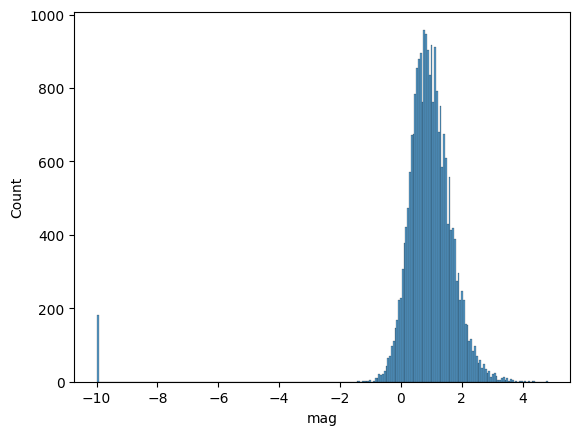

In [84]:
sns.histplot(data = data, x = 'mag')

**Vamos a eliminar outliers**

In [85]:
no_outliers = data['mag'] > -9.00
data = data[no_outliers]
data.head()

,ev_id,otime,loc,lat,lon,dep,mag,alert,url,ev_type,significance,year,date_str
0,uu60061837,2014-03-30 12:34:39.160,"22 km S of Mammoth, Wyoming",44.772167,-110.684667,5.62,4.83,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,700,2014,2014-03-30T12:34:39.160000Z
1,us20006umx,2016-08-27 20:47:47.240,"4 km ENE of Bondurant, Wyoming",43.222600,-110.359300,12.30,4.80,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,580,2016,2016-08-27T20:47:47.240000Z
2,uu60203137,2017-06-16 00:48:46.940,"12 km E of Hebgen Lake Estates, Montana",44.781333,-111.033167,9.30,4.36,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,346,2017,2017-06-16T00:48:46.940000Z
3,mb80153724,2016-06-13 12:14:39.050,"45 km W of Hebgen Lake Estates, Montana",44.730167,-111.763667,9.95,4.34,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,291,2016,2016-06-13T12:14:39.050000Z
4,uu60497322,2022-05-11 13:32:02.230,"36 km S of Silver Gate, Montana",44.681000,-109.996333,13.95,4.22,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,300,2022,2022-05-11T13:32:02.230000Z


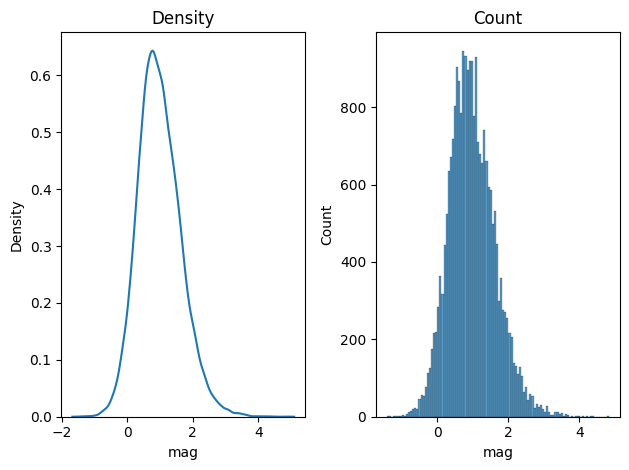

In [86]:
fig, axes = plt.subplots (ncols=2, nrows=1)

sns.kdeplot(data = data, x = 'mag', ax=axes[0])
axes[0].set_title("Density")

sns.histplot(data = data, x = 'mag',ax=axes[1])
axes[1].set_title("Count")

plt.tight_layout()

plt.show()

In [3]:
data.latitude = data['lat']
data.longitude = data['lon']
data.st= pd.read_csv('stations_2021-06.txt', sep=',', names= ['net_id', 'sta_id', 'lat', 'lon', 'elev(m)'])
data.st.lat = data.st['lat']
data.st.lon= data.st['lon']

/tmp/ipykernel_22206/1195597809.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.latitude = data['lat']
/tmp/ipykernel_22206/1195597809.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.longitude = data['lon']
/tmp/ipykernel_22206/1195597809.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.st= pd.read_csv('stations_2021-06.txt', sep=',', names= ['net_id', 'sta_id', 'lat', 'lon', 'elev(m)'])
